In [1]:
from scipy.io import wavfile
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt

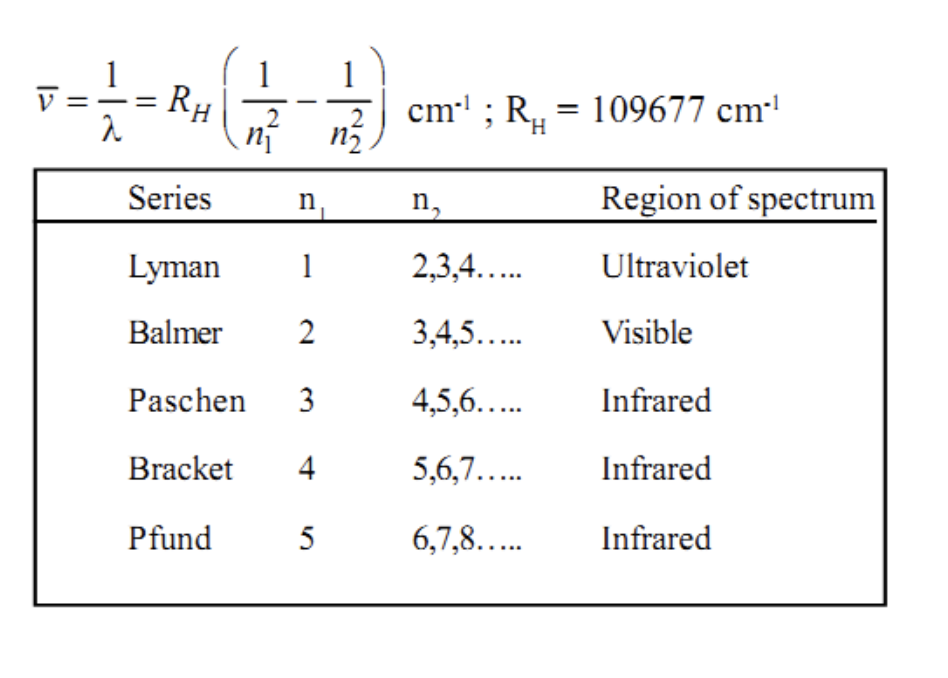

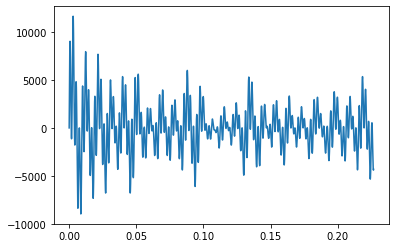

In [2]:
rate = 44100 #44.1 khz
duration = 10 # in sec

def rydberg(n, m):
    return (1 / (n ** 2) - 1 / (m ** 2)) 

def lyman(m):
    """Lyman series"""
    return rydberg(1, m)

def balmer(m):
    """Balmer series"""
    return rydberg(2, m)

def sound(frequency, time):
    return (2**12) * np.sin(2 * np.pi *440* frequency * time) # s(f,t) = Asin(2πft)

t = np.linspace(0, duration, rate * duration)
hydrogen_sound = np.sum([sound(lyman(i), t) + sound(balmer(i), t) for i in range(2, 12)], axis=0) / 6

plt.plot(t[:10000], hydrogen_sound[:10000])
wavfile.write(r"/Users/dhruvkumar/Desktop/scipy_data_hydrogen.wav", rate, hydrogen_sound.astype(np.int16))

In [3]:
import IPython
IPython.display.Audio(r"/Users/dhruvkumar/Desktop/scipy_data_hydrogen.wav")

(0.0, 4.0)

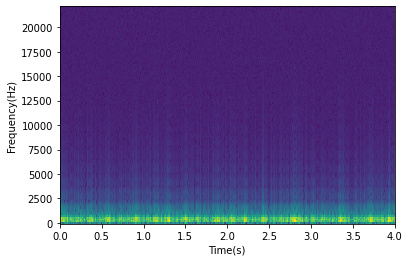

In [4]:
from matplotlib.colors import LogNorm, PowerNorm
rate, data = wavfile.read(r"/Users/dhruvkumar/Desktop/scipy_data_hydrogen.wav")
f, t, Sxx = signal.spectrogram(data, rate)
plt.pcolormesh(t, f, Sxx, norm=PowerNorm(0.1), shading='auto')
plt.ylabel('Frequency(Hz)')
plt.xlabel('Time(s)')
plt.xlim([0, 4])

In [5]:
import IPython
IPython.display.Audio(r"/Users/dhruvkumar/Desktop/scipy_data_synth_sound.wav")

(0.0, 4.0)

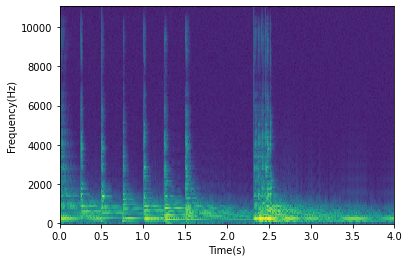

In [6]:
from matplotlib.colors import LogNorm, PowerNorm
rate, data = wavfile.read(r"/Users/dhruvkumar/Desktop/scipy_data_synth_sound.wav")
f, t, Sxx = signal.spectrogram(data, rate)
plt.pcolormesh(t, f, Sxx, norm=PowerNorm(0.1), shading='auto')
plt.ylabel('Frequency(Hz)')
plt.xlabel('Time(s)')
plt.xlim([0, 4])